# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Simpsons
Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [9]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [10]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0


In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/MargeSimpson.png")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-14 00:38:39.934577: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=3008.14
Iteration 200: loss=2071.81
Iteration 300: loss=1703.23
Iteration 400: loss=1500.95
Iteration 500: loss=1369.70
Iteration 600: loss=1276.69
Iteration 700: loss=1205.11
Iteration 800: loss=1146.71
Iteration 900: loss=1098.43
Iteration 1000: loss=1057.58
Iteration 1100: loss=1021.80
Iteration 1200: loss=990.62
Iteration 1300: loss=963.08
Iteration 1400: loss=938.53
Iteration 1500: loss=916.72
Iteration 1600: loss=897.06
Iteration 1700: loss=879.06
Iteration 1800: loss=862.56
Iteration 1900: loss=847.33
Iteration 2000: loss=833.19
Iteration 2100: loss=820.00
Iteration 2200: loss=807.64
Iteration 2300: loss=796.11
Iteration 2400: loss=785.31
Iteration 2500: loss=775.15
Iteration 2600: loss=765.63
Iteration 2700: loss=756.72
Iteration 2800: loss=748.35
Iteration 2900: loss=740.51
Iteration 3000: loss=733.14
Iteration 3100: loss=726.18
Iteration 3200: loss=719.62
Iteration 3300: loss=713.42
Iteration 3400: loss=707.57
Iteration 3500: loss=702.05
Iteration 3600: lo

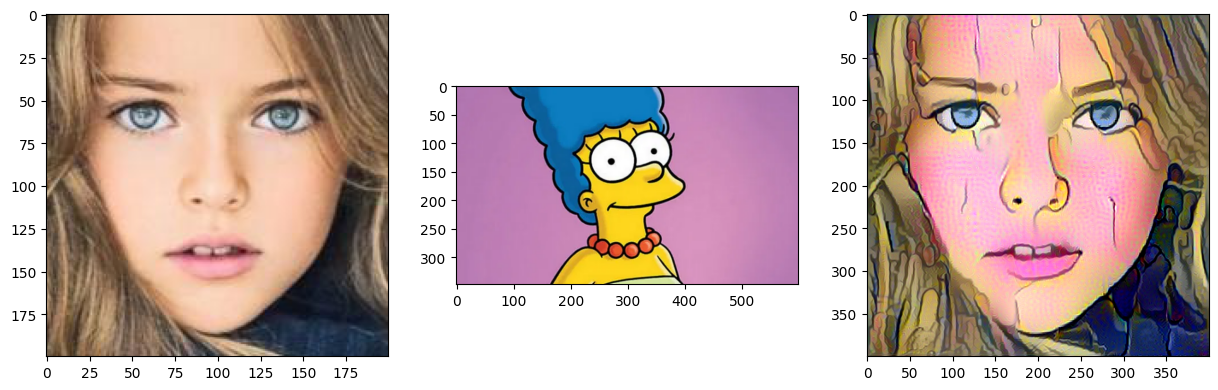

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Simpsons/Marge_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=992.99
Iteration 200: loss=719.49
Iteration 300: loss=573.75
Iteration 400: loss=490.12
Iteration 500: loss=437.19
Iteration 600: loss=400.58
Iteration 700: loss=373.83
Iteration 800: loss=353.45
Iteration 900: loss=337.46
Iteration 1000: loss=324.56
Iteration 1100: loss=313.83
Iteration 1200: loss=304.80
Iteration 1300: loss=297.11
Iteration 1400: loss=290.46
Iteration 1500: loss=284.65
Iteration 1600: loss=279.54
Iteration 1700: loss=274.98
Iteration 1800: loss=270.88
Iteration 1900: loss=267.17
Iteration 2000: loss=263.81
Iteration 2100: loss=260.76
Iteration 2200: loss=257.99
Iteration 2300: loss=255.43
Iteration 2400: loss=253.08
Iteration 2500: loss=250.91
Iteration 2600: loss=248.90
Iteration 2700: loss=247.03
Iteration 2800: loss=245.29
Iteration 2900: loss=243.67
Iteration 3000: loss=242.15
Iteration 3100: loss=240.74
Iteration 3200: loss=239.42
Iteration 3300: loss=238.18
Iteration 3400: loss=237.01
Iteration 3500: loss=235.91
Iteration 3600: loss=234.87
I

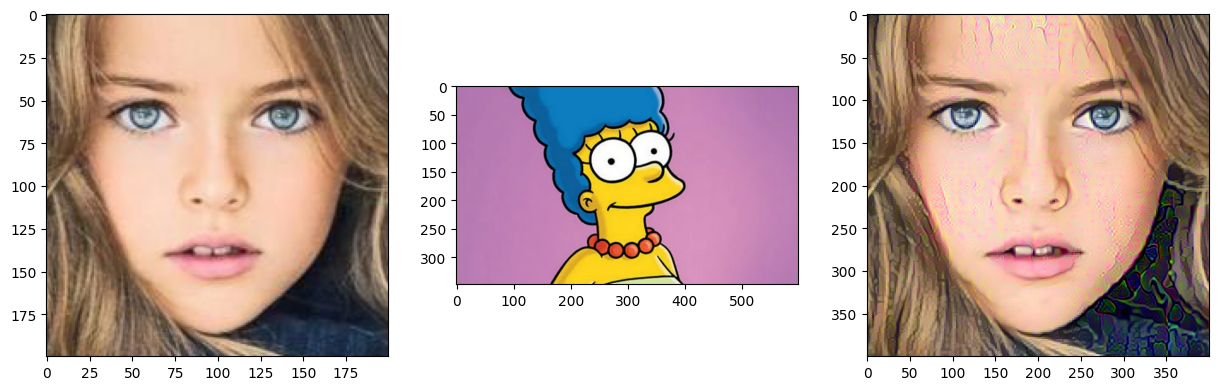

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Simpsons/Marge_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=3585.23
Iteration 200: loss=2614.52
Iteration 300: loss=2227.35
Iteration 400: loss=2016.54
Iteration 500: loss=1881.35
Iteration 600: loss=1780.97
Iteration 700: loss=1703.69
Iteration 800: loss=1641.45
Iteration 900: loss=1589.29
Iteration 1000: loss=1544.56
Iteration 1100: loss=1505.21
Iteration 1200: loss=1470.71
Iteration 1300: loss=1440.36
Iteration 1400: loss=1413.42
Iteration 1500: loss=1389.19
Iteration 1600: loss=1367.21
Iteration 1700: loss=1347.05
Iteration 1800: loss=1328.60
Iteration 1900: loss=1311.69
Iteration 2000: loss=1296.19
Iteration 2100: loss=1281.80
Iteration 2200: loss=1268.48
Iteration 2300: loss=1256.11
Iteration 2400: loss=1244.58
Iteration 2500: loss=1233.81
Iteration 2600: loss=1223.73
Iteration 2700: loss=1214.23
Iteration 2800: loss=1205.30
Iteration 2900: loss=1196.90
Iteration 3000: loss=1189.02
Iteration 3100: loss=1181.57
Iteration 3200: loss=1174.55
Iteration 3300: loss=1167.92
Iteration 3400: loss=1161.66
Iteration 3500: loss=11

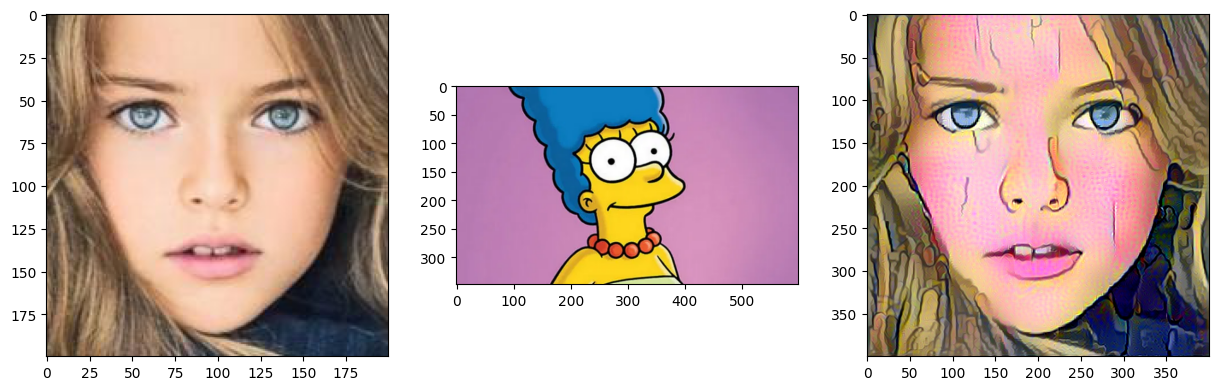

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Simpsons/Marge_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=745.68
Iteration 200: loss=469.09
Iteration 300: loss=353.28
Iteration 400: loss=294.91
Iteration 500: loss=260.43
Iteration 600: loss=237.59
Iteration 700: loss=221.14
Iteration 800: loss=208.56
Iteration 900: loss=198.45
Iteration 1000: loss=190.13
Iteration 1100: loss=183.10
Iteration 1200: loss=177.10
Iteration 1300: loss=171.92
Iteration 1400: loss=167.37
Iteration 1500: loss=163.35
Iteration 1600: loss=159.75
Iteration 1700: loss=156.51
Iteration 1800: loss=153.59
Iteration 1900: loss=150.93
Iteration 2000: loss=148.50
Iteration 2100: loss=146.28
Iteration 2200: loss=144.24
Iteration 2300: loss=142.38
Iteration 2400: loss=140.66
Iteration 2500: loss=139.07
Iteration 2600: loss=137.60
Iteration 2700: loss=136.23
Iteration 2800: loss=134.95
Iteration 2900: loss=133.76
Iteration 3000: loss=132.64
Iteration 3100: loss=131.60
Iteration 3200: loss=130.62
Iteration 3300: loss=129.70
Iteration 3400: loss=128.84
Iteration 3500: loss=128.02
Iteration 3600: loss=127.26
I

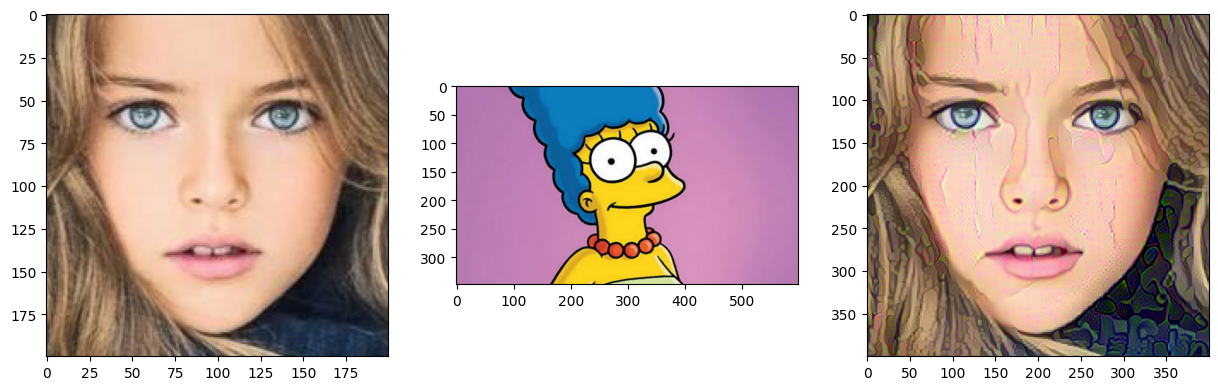

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Simpsons/Marge_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=1439.49
Iteration 200: loss=998.20
Iteration 300: loss=808.90
Iteration 400: loss=697.27
Iteration 500: loss=622.24
Iteration 600: loss=568.05
Iteration 700: loss=527.34
Iteration 800: loss=495.39
Iteration 900: loss=469.56
Iteration 1000: loss=448.35
Iteration 1100: loss=430.57
Iteration 1200: loss=415.47
Iteration 1300: loss=402.47
Iteration 1400: loss=391.17
Iteration 1500: loss=381.25
Iteration 1600: loss=372.46
Iteration 1700: loss=364.59
Iteration 1800: loss=357.54
Iteration 1900: loss=351.22
Iteration 2000: loss=345.51
Iteration 2100: loss=340.33
Iteration 2200: loss=335.60
Iteration 2300: loss=331.27
Iteration 2400: loss=327.29
Iteration 2500: loss=323.63
Iteration 2600: loss=320.23
Iteration 2700: loss=317.08
Iteration 2800: loss=314.17
Iteration 2900: loss=311.47
Iteration 3000: loss=308.95
Iteration 3100: loss=306.59
Iteration 3200: loss=304.40
Iteration 3300: loss=302.34
Iteration 3400: loss=300.41
Iteration 3500: loss=298.60
Iteration 3600: loss=296.90


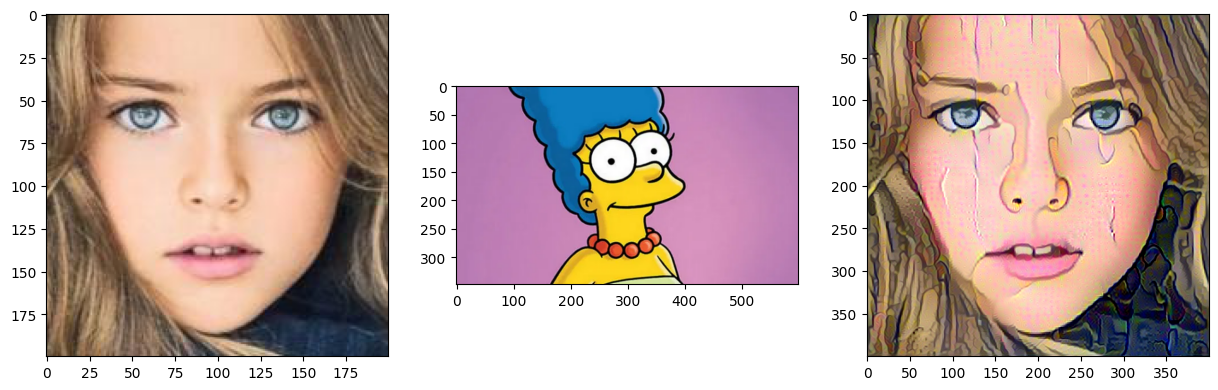

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Simpsons/Marge_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()